<h1><center>MÉTODO DE SOLUCIÓN I</center></h1>

RESUMEN:<br>
&ensp;1.Suposiciones sobre la demanda<br>
&ensp;2.Representación gráfica<br>
&ensp;3.Parametros<br>
&ensp;5.Modelo<br>
&ensp;4.Solución para Q=10<br>
&emsp;*5.1. Week 1<br>
&emsp;5.2. Week 2<br>
&emsp;5.3. Week 3<br>
&emsp;5.4. Week 4<br>
&ensp;6.Solución para Q=15<br>
&emsp;*6.1. Week 1<br>
&emsp;6.2. Week 2<br>
&emsp;6.3. Week 3<br>
&emsp;6.4. Week 4<br>

En este Script se plantea el método de solución exacto para el sistema de recogida utilizando una flota homogenea de camiones.
A continuación, se detalla paso a paso, cada una de las instrucciones necesarias para obtener la solución.

## 1. Suposiciones sobre la demanda

En primer lugar, acorde con los datos proporcionados por el ayuntamiento de Barcelona (Ilustración 1 de la memoria del proyecto), se calcula el  volumen aproximado de residuos a recoger mensualmente.

In [1]:
import numpy as np
Demanda_Total_Anual= 2531
mes=12

In [2]:
#Asumimos que la demanda anual se distribuye linealmente para cada mes del año.
Demanda_month=round(Demanda_Total_Anual/mes)
Demanda_month

211

Para simplificar la resolución del problema, no consideramos obtener el mínimo coste anual para los 27 puntos verdes, sino que
planteamos optimizar el coste mensual de una red con solo 10 puntos verdes.

Asumimos que la demanda mensual es de 211 toneladas, la cual se distribuye aleatoriamente entre las 4 semanas. 
Asimismo, la correspondiente demanda semanal también se distribuye de forma completamente aleatoria entre los diferentes puntos verdes. 

De esta forma, consideremos un escenario parecido a la realidad. Se quiere optimizar el coste mensual del servicio, sabiendo que la demanda total semanal y las necesidades del los nodos, varian en cada perido de tiempo.


In [3]:
#Asumimos que la demanda mensual se distrybuye aleatoriamente entre las 4 semanas de cada mes.
rnd = np.random
rnd.seed(0)
Demanda_weeks=np.random.multinomial(Demanda_month, np.ones(4)/4, size=1)[0].tolist()
Demanda_weeks

[56, 53, 62, 40]

In [4]:
#Genero el conjunto de nodos a los cuales debemos ofrecer servicios
n=10
puntos_verdes=[x for x in range(1,n+1)]
puntos_verdes

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [5]:
#Creo una función para asignar una demanda aleatoria  en cada punto verde.
rnd = np.random
rnd.seed(0)
def get_nodos_demand(semana):
    n=10
    key=puntos_verdes
    values=np.random.multinomial(semana, np.ones(n)/n, size=1)[0].tolist()
    r=dict(zip(key,values))
    return r

In [6]:
# Semana 1
week1=get_nodos_demand(Demanda_weeks[0])
week1, sum(week1.values())

({1: 6, 2: 7, 3: 6, 4: 5, 5: 5, 6: 6, 7: 5, 8: 8, 9: 6, 10: 2}, 56)

In [7]:
# Semana 2
week2=get_nodos_demand(Demanda_weeks[1])
week2, sum(week2.values())

({1: 5, 2: 7, 3: 5, 4: 5, 5: 8, 6: 2, 7: 3, 8: 2, 9: 10, 10: 6}, 53)

In [8]:
# Semana 3
week3=get_nodos_demand(Demanda_weeks[2])
week3, sum(week3.values())

({1: 8, 2: 9, 3: 10, 4: 7, 5: 4, 6: 6, 7: 2, 8: 6, 9: 3, 10: 7}, 62)

In [9]:
# Semana 4
week4=get_nodos_demand(Demanda_weeks[3])
week4, sum(week4.values())

({1: 7, 2: 4, 3: 3, 4: 3, 5: 5, 6: 3, 7: 4, 8: 1, 9: 5, 10: 5}, 40)

In [10]:
week_demand_puntoverde={1:week1,2:week2,3:week3,4:week4}
week_demand_puntoverde

{1: {1: 6, 2: 7, 3: 6, 4: 5, 5: 5, 6: 6, 7: 5, 8: 8, 9: 6, 10: 2},
 2: {1: 5, 2: 7, 3: 5, 4: 5, 5: 8, 6: 2, 7: 3, 8: 2, 9: 10, 10: 6},
 3: {1: 8, 2: 9, 3: 10, 4: 7, 5: 4, 6: 6, 7: 2, 8: 6, 9: 3, 10: 7},
 4: {1: 7, 2: 4, 3: 3, 4: 3, 5: 5, 6: 3, 7: 4, 8: 1, 9: 5, 10: 5}}

## 2. Representación gráfica del problema

Si se asume una flota homogenea de camiones, el problema planteado es bastante simple. Se debe calcular un CVRP (Capacited Vehicle Routing Problem) para cada semana iterativamente. Para cada considerando la distribución de los residuos en los diferentes nodos en cada periodo de tiempo.

El coste total mensual, será el coste optimo de transporte para cada semana, más el coste fijo determinado por el número mínimo de camiones necesarios ese mes.

In [11]:
#Genero el conjunto Vertices = Puntos verdes + Deposito común
vertices=[0]+puntos_verdes
vertices

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [12]:
#Creo unas coordenadas aleatorias para todos los vertices
rnd = np.random
rnd.seed(0)
loc_x=rnd.rand(len(vertices))*100
loc_y=rnd.rand(len(vertices))*100

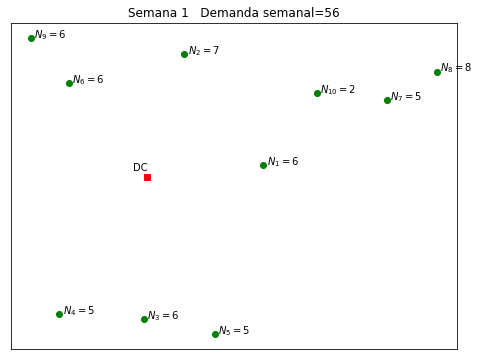

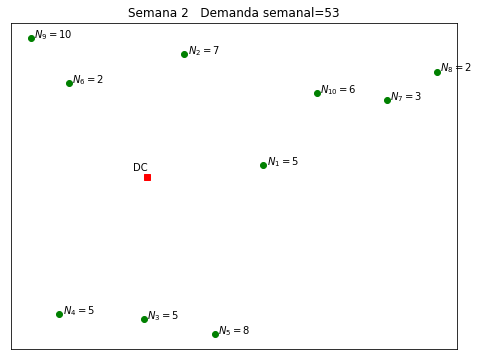

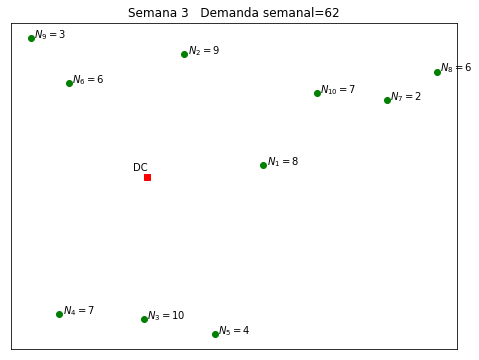

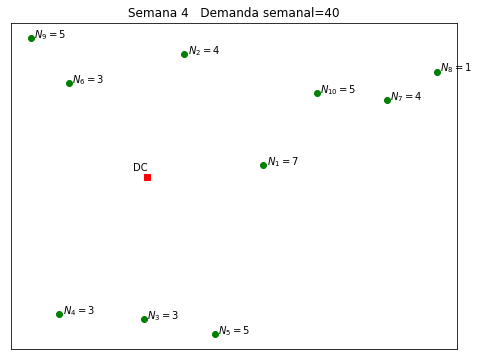

In [13]:
import matplotlib.pyplot as plt

for t,w in week_demand_puntoverde.items():
    plt.figure(figsize=(8,6))
    plt.scatter(loc_x[1:],loc_y[1:],color="green")
    plt.xticks([])
    plt.yticks([])
    plt.title("Semana %d   Demanda semanal=%d" %(t,sum(w.values())))
    for i in puntos_verdes:
        plt.annotate('$N_{%d}=%d$' % (i,w[i]),(loc_x[i]+0.5,loc_y[i]))
    #Expongo el deposito comun
    plt.plot(loc_x[0], loc_y[0], c='r', marker='s')
    plt.annotate('DC',(loc_x[0]-2,loc_y[0]+2))

## 3. Parametros

Configuramos los parametros restantes que aún no han sido definidos.

In [14]:
#Genero el conjunto de arcos
arcos={(i,j) for i in vertices for j in vertices if i!=j}
list(arcos)[:5]

[(4, 0), (4, 9), (5, 1), (8, 0), (5, 10)]

In [15]:
# Genero el conjunto de costes

# La distancia entre los nodos determina el coste de transporte. Se ha calculado la distancia euclidean entre todos los vertices

coste={(i,j):round(np.hypot(loc_x[i]-loc_x[j],loc_y[i]-loc_y[j])) 
           for i in vertices for j in vertices if i!=j}

## 4. Modelo

In [16]:
from gurobipy import Model, GRB, quicksum

## 5. Solución para Q=10

Consideremos una flota uniforme de camiones de 10 toneladas.

In [17]:
Q1=10

### 5.1. Week 1

In [18]:
week1

{1: 6, 2: 7, 3: 6, 4: 5, 5: 5, 6: 6, 7: 5, 8: 8, 9: 6, 10: 2}

In [19]:
mdl = Model('VRP')

Academic license - for non-commercial use only - expires 2021-06-25
Using license file C:\Users\bassa\gurobi.lic


In [20]:
x = mdl.addVars(arcos, vtype=GRB.BINARY)
u = mdl.addVars(puntos_verdes, vtype=GRB.CONTINUOUS)

In [21]:
mdl.modelSense = GRB.MINIMIZE
mdl.setObjective(quicksum(300*x[0,j] for j in puntos_verdes)+
                 quicksum(x[i, j]*coste[i, j] for i, j in arcos))

In [22]:
mdl.addConstrs(quicksum(x[i, j] for j in vertices if j != i) == 1 for i in puntos_verdes);
mdl.addConstrs(quicksum(x[i, j] for i in vertices if i != j) == 1 for j in puntos_verdes);
mdl.addConstrs((x[i, j] == 1) >> (u[i]+week1[j] <= u[j])
               for i, j in arcos if i != 0 and j != 0);
mdl.addConstrs(u[i] >= week1[i] for i in puntos_verdes);
mdl.addConstrs(u[i] <= Q1 for i in puntos_verdes);

In [23]:
mdl.optimize()

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 40 rows, 120 columns and 220 nonzeros
Model fingerprint: 0x8638d9a2
Model has 90 general constraints
Variable types: 10 continuous, 110 integer (110 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+01, 4e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+01]
Presolve removed 12 rows and 87 columns
Presolve time: 0.01s
Presolved: 28 rows, 33 columns, 184 nonzeros
Variable types: 9 continuous, 24 integer (24 binary)

Root relaxation: objective 2.958000e+03, 6 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0 2958.00000    0    3          - 2958.00000      -     -    0s
H    0     0                    3080.0000000 2958.00000  3.96%     -    0s


In [24]:
#Coste de transporte de la semana 1
mdl.ObjVal

3080.0

In [25]:
arcos_activos1 = [a for a in arcos if x[a].x > 0.99]


In [26]:
#Calculamos el numero de rutas/camiones necesarios
n_rutas=0
for t in arcos_activos1:
    if t[0]==0:
        n_rutas+=1

<function matplotlib.pyplot.show(close=None, block=None)>

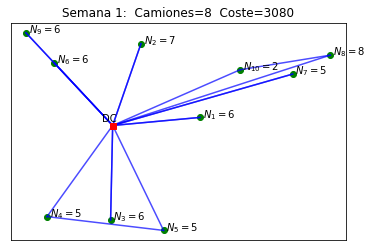

In [27]:
#Representación de la solución
plt.figure(figsize=(6,4))
plt.scatter(loc_x[1:],loc_y[1:],color="green")
plt.xticks([])
plt.yticks([])
plt.title("Semana 1:  Camiones=%d  Coste=%d" %(n_rutas,mdl.ObjVal))
for i in puntos_verdes:
    plt.annotate('$N_{%d}=%d$' % (i,week1[i]),(loc_x[i]+0.5,loc_y[i]))
for i,j in arcos_activos1:
    plt.plot([loc_x[i],loc_x[j]],[loc_y[i],loc_y[j]],color="blue",alpha=0.7)
#Expongo el deposito comun
plt.plot(loc_x[0], loc_y[0], c='r', marker='s')
plt.annotate('DC',(loc_x[0]-2,loc_y[0]+2))
plt.show

### 5.2. Week 2

In [28]:
week2

{1: 5, 2: 7, 3: 5, 4: 5, 5: 8, 6: 2, 7: 3, 8: 2, 9: 10, 10: 6}

In [29]:
md2 = Model('VRP')

In [30]:
x = md2.addVars(arcos, vtype=GRB.BINARY)
u = md2.addVars(puntos_verdes, vtype=GRB.CONTINUOUS)

In [31]:
md2.modelSense = GRB.MINIMIZE
md2.setObjective(quicksum(300*x[0,j] for j in puntos_verdes)+
                 quicksum(x[i, j]*coste[i, j] for i, j in arcos))

In [32]:
md2.addConstrs(quicksum(x[i, j] for j in vertices if j != i) == 1 for i in puntos_verdes);
md2.addConstrs(quicksum(x[i, j] for i in vertices if i != j) == 1 for j in puntos_verdes);
md2.addConstrs((x[i, j] == 1) >> (u[i]+week2[j] == u[j])
               for i, j in arcos if i != 0 and j != 0);
md2.addConstrs(u[i] >= week2[i] for i in puntos_verdes);
md2.addConstrs(u[i] <= Q1 for i in puntos_verdes);

In [33]:
md2.optimize()

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 40 rows, 120 columns and 220 nonzeros
Model fingerprint: 0x11ef33ca
Model has 90 general constraints
Variable types: 10 continuous, 110 integer (110 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+01, 4e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+01]
Presolve added 50 rows and 0 columns
Presolve removed 0 rows and 59 columns
Presolve time: 0.00s
Presolved: 90 rows, 61 columns, 570 nonzeros
Variable types: 15 continuous, 46 integer (46 binary)
Found heuristic solution: objective 2790.0000000

Root relaxation: objective 1.823978e+03, 62 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0 1823.97800    0   21 2790.00000 1823.97800  34.6% 

In [34]:
#Coste de transporte de la semana 2
md2.ObjVal

2377.0

In [35]:
arcos_activos2 = [a for a in arcos if x[a].x > 0.99]

In [36]:
#Calculamos el numero de rutas/camiones necesarios
n_rutas=0
for t in arcos_activos2:
    if t[0]==0:
        n_rutas+=1

<function matplotlib.pyplot.show(close=None, block=None)>

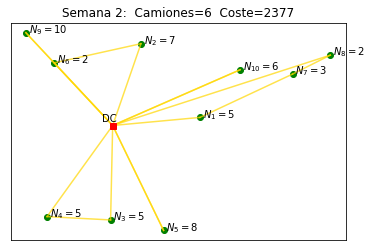

In [37]:
#Representación de la solución
plt.figure(figsize=(6,4))
plt.scatter(loc_x[1:],loc_y[1:],color="green")
plt.xticks([])
plt.yticks([])
plt.title("Semana 2:  Camiones=%d  Coste=%d" %(n_rutas,md2.ObjVal))
for i in puntos_verdes:
    plt.annotate('$N_{%d}=%d$' % (i,week2[i]),(loc_x[i]+0.5,loc_y[i]))
for i,j in arcos_activos2:
    plt.plot([loc_x[i],loc_x[j]],[loc_y[i],loc_y[j]],color="gold",alpha=0.7)
#Expongo el deposito comun
plt.plot(loc_x[0], loc_y[0], c='r', marker='s')
plt.annotate('DC',(loc_x[0]-2,loc_y[0]+2))
plt.show

### 5.3. Week 3

In [38]:
week3

{1: 8, 2: 9, 3: 10, 4: 7, 5: 4, 6: 6, 7: 2, 8: 6, 9: 3, 10: 7}

In [39]:
md3 = Model('VRP')

In [40]:
x = md3.addVars(arcos, vtype=GRB.BINARY)
u = md3.addVars(puntos_verdes, vtype=GRB.CONTINUOUS)

In [41]:
md3.modelSense = GRB.MINIMIZE
md3.setObjective(quicksum(300*x[0,j] for j in puntos_verdes)+
                 quicksum(x[i, j]*coste[i, j] for i, j in arcos))

In [42]:
md3.addConstrs(quicksum(x[i, j] for j in vertices if j != i) == 1 for i in puntos_verdes);
md3.addConstrs(quicksum(x[i, j] for i in vertices if i != j) == 1 for j in puntos_verdes);
md3.addConstrs((x[i, j] == 1) >> (u[i]+week3[j] == u[j])
               for i, j in arcos if i != 0 and j != 0);
md3.addConstrs(u[i] >= week3[i] for i in puntos_verdes);
md3.addConstrs(u[i] <= Q1 for i in puntos_verdes);

In [43]:
md3.optimize()

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 40 rows, 120 columns and 220 nonzeros
Model fingerprint: 0x496035c9
Model has 90 general constraints
Variable types: 10 continuous, 110 integer (110 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+01, 4e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+01]
Presolve added 9 rows and 0 columns
Presolve removed 0 rows and 82 columns
Presolve time: 0.01s
Presolved: 49 rows, 38 columns, 318 nonzeros
Variable types: 10 continuous, 28 integer (28 binary)

Root relaxation: objective 2.779000e+03, 17 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0               0    2779.0000000 2779.00000  0.00%     -    0s

Explored 0 nodes (17 simplex iteratio

In [44]:
#Coste de transporte de la semana 3
md3.ObjVal

2779.0

In [45]:
arcos_activos3 = [a for a in arcos if x[a].x > 0.99]

In [46]:
#Calculamos el número de rutas/camiones necesarios
n_rutas=0
for t in arcos_activos3:
    if t[0]==0:
        n_rutas+=1

<function matplotlib.pyplot.show(close=None, block=None)>

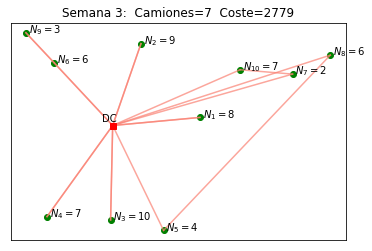

In [47]:
#Representación de la solución
plt.figure(figsize=(6,4))
plt.scatter(loc_x[1:],loc_y[1:],color="green")
plt.xticks([])
plt.yticks([])
plt.title("Semana 3:  Camiones=%d  Coste=%d" %(n_rutas,md3.ObjVal))
for i in puntos_verdes:
    plt.annotate('$N_{%d}=%d$' % (i,week3[i]),(loc_x[i]+0.5,loc_y[i]))
for i,j in arcos_activos3:
    plt.plot([loc_x[i],loc_x[j]],[loc_y[i],loc_y[j]],color="Salmon",alpha=0.7)
#Expongo el deposito comun
plt.plot(loc_x[0], loc_y[0], c='r', marker='s')
plt.annotate('DC',(loc_x[0]-2,loc_y[0]+2))
plt.show

### 5.4. Week 4

In [48]:
week4

{1: 7, 2: 4, 3: 3, 4: 3, 5: 5, 6: 3, 7: 4, 8: 1, 9: 5, 10: 5}

In [49]:
md4 = Model('VRP')

In [50]:
x = md4.addVars(arcos, vtype=GRB.BINARY)
u = md4.addVars(puntos_verdes, vtype=GRB.CONTINUOUS)

In [51]:
md4.modelSense = GRB.MINIMIZE
md4.setObjective(quicksum(300*x[0,j] for j in puntos_verdes)+
                 quicksum(x[i, j]*coste[i, j] for i, j in arcos))

In [52]:
md4.addConstrs(quicksum(x[i, j] for j in vertices if j != i) == 1 for i in puntos_verdes);
md4.addConstrs(quicksum(x[i, j] for i in vertices if i != j) == 1 for j in puntos_verdes);
md4.addConstrs((x[i, j] == 1) >> (u[i]+week4[j] == u[j])
               for i, j in arcos if i != 0 and j != 0);
md4.addConstrs(u[i] >= week4[i] for i in puntos_verdes);
md4.addConstrs(u[i] <= Q1 for i in puntos_verdes);

In [53]:
md4.optimize()

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 40 rows, 120 columns and 220 nonzeros
Model fingerprint: 0xa0ea8d8c
Model has 90 general constraints
Variable types: 10 continuous, 110 integer (110 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+01, 4e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+01]
Presolve added 133 rows and 0 columns
Presolve removed 0 rows and 10 columns
Presolve time: 0.01s
Presolved: 173 rows, 110 columns, 1104 nonzeros
Variable types: 30 continuous, 80 integer (80 binary)

Root relaxation: objective 5.264302e+02, 46 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0  526.43021    0   25          -  526.43021      -     -    0s
H    0     0                    3

In [54]:
#Coste de transporte de la semana 4
md4.ObjVal

1779.0

In [55]:
arcos_activos4 = [a for a in arcos if x[a].x > 0.99]

In [56]:
#Calculamos el número de rutas/camiones necesarios
n_rutas=0
for t in arcos_activos4:
    if t[0]==0:
        n_rutas+=1

<function matplotlib.pyplot.show(close=None, block=None)>

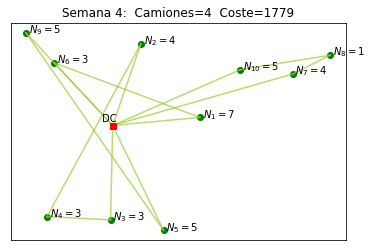

In [57]:
#Representación de la solución
plt.figure(figsize=(6,4))
plt.scatter(loc_x[1:],loc_y[1:],color="green")
plt.xticks([])
plt.yticks([])
plt.title("Semana 4:  Camiones=%d  Coste=%d" %(n_rutas,md4.ObjVal))
for i in puntos_verdes:
    plt.annotate('$N_{%d}=%d$' % (i,week4[i]),(loc_x[i]+0.5,loc_y[i]))
for i,j in arcos_activos4:
    plt.plot([loc_x[i],loc_x[j]],[loc_y[i],loc_y[j]],color="yellowgreen",alpha=0.7)
#Expongo el deposito comun
plt.plot(loc_x[0], loc_y[0], c='r', marker='s')
plt.annotate('DC',(loc_x[0]-2,loc_y[0]+2))
plt.show

## 6. Solución para Q=15
Consideremos una flota uniforme de camiones de 15 toneladas. Estos camiones tienen un coste de transporte 20% superior a los camiones de 10 toneladas.

In [100]:
Q2=15

In [104]:
# La distancia entre los nodos determina el coste de transporte. Se ha calculado la distancia euclidean entre todos los vertices.
# Ahora el coste de transporte es un 20% más caro.

coste2={(i,j):round(np.hypot(loc_x[i]-loc_x[j],loc_y[i]-loc_y[j])*1.2) 
           for i in vertices for j in vertices if i!=j}

### 6.1. Week 1

In [105]:
week1

{1: 6, 2: 7, 3: 6, 4: 5, 5: 5, 6: 6, 7: 5, 8: 8, 9: 6, 10: 2}

In [106]:
md5 = Model('VRP')

In [107]:
x = md5.addVars(arcos, vtype=GRB.BINARY)
u = md5.addVars(puntos_verdes, vtype=GRB.CONTINUOUS)

In [108]:
md5.modelSense = GRB.MINIMIZE
md5.setObjective(quicksum(500*x[0,j] for j in puntos_verdes)+
                 quicksum(x[i, j]*coste2[i, j] for i, j in arcos))

In [109]:
md5.addConstrs(quicksum(x[i, j] for j in vertices if j != i) == 1 for i in puntos_verdes);
md5.addConstrs(quicksum(x[i, j] for i in vertices if i != j) == 1 for j in puntos_verdes);
md5.addConstrs((x[i, j] == 1) >> (u[i]+week1[j] == u[j])
               for i, j in arcos if i != 0 and j != 0);
md5.addConstrs(u[i] >= week1[i] for i in puntos_verdes);
md5.addConstrs(u[i] <= Q2 for i in puntos_verdes);

In [110]:
md5.optimize()

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 40 rows, 120 columns and 220 nonzeros
Model fingerprint: 0x314f0b3a
Model has 90 general constraints
Variable types: 10 continuous, 110 integer (110 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+01, 6e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+01]
Presolve added 162 rows and 5 columns
Presolve time: 0.04s
Presolved: 202 rows, 125 columns, 1283 nonzeros
Variable types: 35 continuous, 90 integer (90 binary)

Root relaxation: objective 2.537494e+02, 61 iterations, 0.01 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0  253.74942    0   29          -  253.74942      -     -    0s
H    0     0                    5424.0000000  253.74942  95.3%     -    

In [66]:
#Coste de transporte de la semana 1
md5.ObjVal

2681.0

In [67]:
arcos_activos5 = [a for a in arcos if x[a].x > 0.99]

In [68]:
#Calculamos el número de rutas/camiones necesarios
n_rutas=0
for t in arcos_activos5:
    if t[0]==0:
        n_rutas+=1

<function matplotlib.pyplot.show(close=None, block=None)>

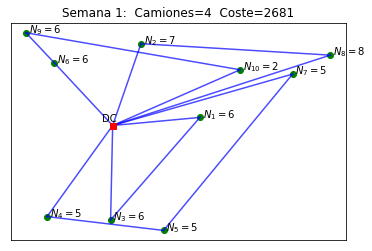

In [69]:
#Representación de la solución
plt.figure(figsize=(6,4))
plt.scatter(loc_x[1:],loc_y[1:],color="green")
plt.xticks([])
plt.yticks([])
plt.title("Semana 1:  Camiones=%d  Coste=%d" %(n_rutas,md5.ObjVal))
for i in puntos_verdes:
    plt.annotate('$N_{%d}=%d$' % (i,week1[i]),(loc_x[i]+0.5,loc_y[i]))
for i,j in arcos_activos5:
    plt.plot([loc_x[i],loc_x[j]],[loc_y[i],loc_y[j]],color="blue",alpha=0.7)
#Expongo el deposito comun
plt.plot(loc_x[0], loc_y[0], c='r', marker='s')
plt.annotate('DC',(loc_x[0]-2,loc_y[0]+2))
plt.show

### 6.2. Week 2

In [70]:
week2

{1: 5, 2: 7, 3: 5, 4: 5, 5: 8, 6: 2, 7: 3, 8: 2, 9: 10, 10: 6}

In [71]:
md6 = Model('VRP')

In [72]:
x = md6.addVars(arcos, vtype=GRB.BINARY)
u = md6.addVars(puntos_verdes, vtype=GRB.CONTINUOUS)

In [73]:
md6.modelSense = GRB.MINIMIZE
md6.setObjective(quicksum(500*x[0,j] for j in puntos_verdes)+
                 quicksum(x[i, j]*coste2[i, j] for i, j in arcos))

In [74]:
md6.addConstrs(quicksum(x[i, j] for j in vertices if j != i) == 1 for i in puntos_verdes);
md6.addConstrs(quicksum(x[i, j] for i in vertices if i != j) == 1 for j in puntos_verdes);
md6.addConstrs((x[i, j] == 1) >> (u[i]+week2[j] == u[j])
               for i, j in arcos if i != 0 and j != 0);
md6.addConstrs(u[i] >= week2[i] for i in puntos_verdes);
md6.addConstrs(u[i] <= Q2 for i in puntos_verdes);

In [75]:
md6.optimize()

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 40 rows, 120 columns and 220 nonzeros
Model fingerprint: 0x2ce05770
Model has 90 general constraints
Variable types: 10 continuous, 110 integer (110 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+01, 6e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+01]
Presolve added 154 rows and 0 columns
Presolve time: 0.01s
Presolved: 194 rows, 120 columns, 1196 nonzeros
Variable types: 36 continuous, 84 integer (84 binary)

Root relaxation: objective 2.991236e+02, 96 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0  299.12361    0   28          -  299.12361      -     -    0s
H    0     0                    5992.0000000  299.12361  95.0%     -    

In [76]:
#Coste de transporte de la semana 2
md6.ObjVal

2598.0

In [77]:
arcos_activos6 = [a for a in arcos if x[a].x > 0.99]

In [78]:
n_rutas=0
for t in arcos_activos6:
    if t[0]==0:
        n_rutas+=1

<function matplotlib.pyplot.show(close=None, block=None)>

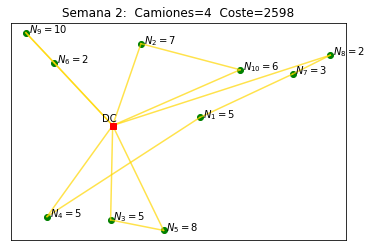

In [79]:
#Representación de la solución
plt.figure(figsize=(6,4))
plt.scatter(loc_x[1:],loc_y[1:],color="green")
plt.xticks([])
plt.yticks([])
plt.title("Semana 2:  Camiones=%d  Coste=%d" %(n_rutas,md6.ObjVal))
for i in puntos_verdes:
    plt.annotate('$N_{%d}=%d$' % (i,week2[i]),(loc_x[i]+0.5,loc_y[i]))
for i,j in arcos_activos6:
    plt.plot([loc_x[i],loc_x[j]],[loc_y[i],loc_y[j]],color="gold",alpha=0.7)
#Expongo el deposito comun
plt.plot(loc_x[0], loc_y[0], c='r', marker='s')
plt.annotate('DC',(loc_x[0]-2,loc_y[0]+2))
plt.show

### 6.3. Week 3

In [80]:
week3

{1: 8, 2: 9, 3: 10, 4: 7, 5: 4, 6: 6, 7: 2, 8: 6, 9: 3, 10: 7}

In [81]:
md7 = Model('VRP')

In [82]:
x = md7.addVars(arcos, vtype=GRB.BINARY)
u = md7.addVars(puntos_verdes, vtype=GRB.CONTINUOUS)

In [83]:
md7.modelSense = GRB.MINIMIZE
md7.setObjective(quicksum(500*x[0,j] for j in puntos_verdes)+
                 quicksum(x[i, j]*coste2[i, j] for i, j in arcos))

In [84]:
md7.addConstrs(quicksum(x[i, j] for j in vertices if j != i) == 1 for i in puntos_verdes);
md7.addConstrs(quicksum(x[i, j] for i in vertices if i != j) == 1 for j in puntos_verdes);
md7.addConstrs((x[i, j] == 1) >> (u[i]+week3[j] == u[j])
               for i, j in arcos if i != 0 and j != 0);
md7.addConstrs(u[i] >= week3[i] for i in puntos_verdes);
md7.addConstrs(u[i] <= Q2 for i in puntos_verdes);

In [85]:
md7.optimize()

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 40 rows, 120 columns and 220 nonzeros
Model fingerprint: 0xb92f30bc
Model has 90 general constraints
Variable types: 10 continuous, 110 integer (110 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+01, 6e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+01]
Presolve added 114 rows and 0 columns
Presolve removed 0 rows and 22 columns
Presolve time: 0.01s
Presolved: 154 rows, 98 columns, 990 nonzeros
Variable types: 26 continuous, 72 integer (72 binary)

Root relaxation: objective 1.189525e+03, 103 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0 1189.52526    0   39          - 1189.52526      -     -    0s
H    0     0                    48

In [86]:
#Coste de transporte de la semana 3
md7.ObjVal

3110.0

In [87]:
arcos_activos7 = [a for a in arcos if x[a].x > 0.99]

In [88]:
n_rutas=0
for t in arcos_activos7:
    if t[0]==0:
        n_rutas+=1

<function matplotlib.pyplot.show(close=None, block=None)>

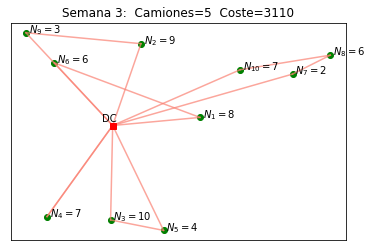

In [89]:
#Representación de la solución
plt.figure(figsize=(6,4))
plt.scatter(loc_x[1:],loc_y[1:],color="green")
plt.xticks([])
plt.yticks([])
plt.title("Semana 3:  Camiones=%d  Coste=%d" %(n_rutas,md7.ObjVal))
for i in puntos_verdes:
    plt.annotate('$N_{%d}=%d$' % (i,week3[i]),(loc_x[i]+0.5,loc_y[i]))
for i,j in arcos_activos7:
    plt.plot([loc_x[i],loc_x[j]],[loc_y[i],loc_y[j]],color="Salmon",alpha=0.7)
#Expongo el deposito comun
plt.plot(loc_x[0], loc_y[0], c='r', marker='s')
plt.annotate('DC',(loc_x[0]-2,loc_y[0]+2))
plt.show

### 6.4. Week 4

In [90]:
week4

{1: 7, 2: 4, 3: 3, 4: 3, 5: 5, 6: 3, 7: 4, 8: 1, 9: 5, 10: 5}

In [91]:
md8 = Model('VRP')

In [92]:
x = md8.addVars(arcos, vtype=GRB.BINARY)
u = md8.addVars(puntos_verdes, vtype=GRB.CONTINUOUS)

In [93]:
md8.modelSense = GRB.MINIMIZE
md8.setObjective(quicksum(500*x[0,j] for j in puntos_verdes)+
                 quicksum(x[i, j]*coste2[i, j] for i, j in arcos))

In [94]:
md8.addConstrs(quicksum(x[i, j] for j in vertices if j != i) == 1 for i in puntos_verdes);
md8.addConstrs(quicksum(x[i, j] for i in vertices if i != j) == 1 for j in puntos_verdes);
md8.addConstrs((x[i, j] == 1) >> (u[i]+week4[j] == u[j])
               for i, j in arcos if i != 0 and j != 0);
md8.addConstrs(u[i] >= week4[i] for i in puntos_verdes);
md8.addConstrs(u[i] <= Q2 for i in puntos_verdes);

In [95]:
md8.optimize()

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 40 rows, 120 columns and 220 nonzeros
Model fingerprint: 0x8ef9f219
Model has 90 general constraints
Variable types: 10 continuous, 110 integer (110 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+01, 6e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+01]
Presolve added 181 rows and 13 columns
Presolve time: 0.01s
Presolved: 221 rows, 133 columns, 1330 nonzeros
Variable types: 43 continuous, 90 integer (90 binary)

Root relaxation: objective 2.238586e+02, 62 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0  223.85859    0   22          -  223.85859      -     -    0s
H    0     0                    5992.0000000  223.85859  96.3%     -   

In [96]:
#Coste de transporte de la semana 4
md8.ObjVal

1950.0

In [97]:
arcos_activos8 = [a for a in arcos if x[a].x > 0.99]

In [98]:
n_rutas=0
for t in arcos_activos8:
    if t[0]==0:
        n_rutas+=1

<function matplotlib.pyplot.show(close=None, block=None)>

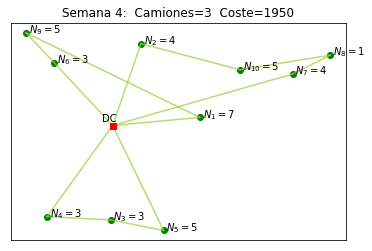

In [99]:
#Representación de la solución
plt.figure(figsize=(6,4))
plt.scatter(loc_x[1:],loc_y[1:],color="green")
plt.xticks([])
plt.yticks([])
plt.title("Semana 4:  Camiones=%d  Coste=%d" %(n_rutas,md8.ObjVal))
for i in puntos_verdes:
    plt.annotate('$N_{%d}=%d$' % (i,week4[i]),(loc_x[i]+0.5,loc_y[i]))
for i,j in arcos_activos8:
    plt.plot([loc_x[i],loc_x[j]],[loc_y[i],loc_y[j]],color="yellowgreen",alpha=0.7)
#Expongo el deposito comun
plt.plot(loc_x[0], loc_y[0], c='r', marker='s')
plt.annotate('DC',(loc_x[0]-2,loc_y[0]+2))
plt.show